In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [2]:
# Define the image
image1 = np.array([[141, 0 , 138, 143, 143, 143, 144],
                [141, 140, 140, 142, 142, 143, 143],
                [140, 145, 145, 144, 142, 142, 145],
                [141, 141, 141, 143, 142, 141, 143],
                [139, 140, 141, 141, 142, 143, 144]],dtype=np.uint8)


In [3]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

Text(0.5, 1.0, 'histogram')

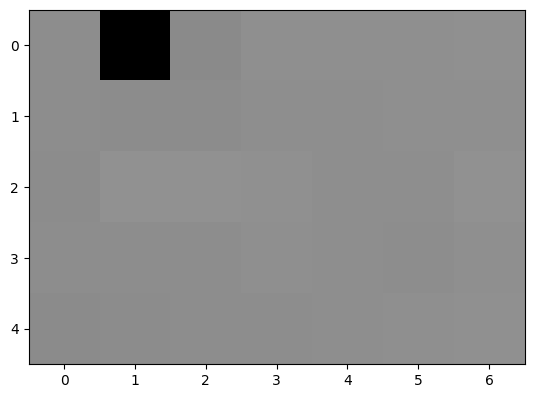

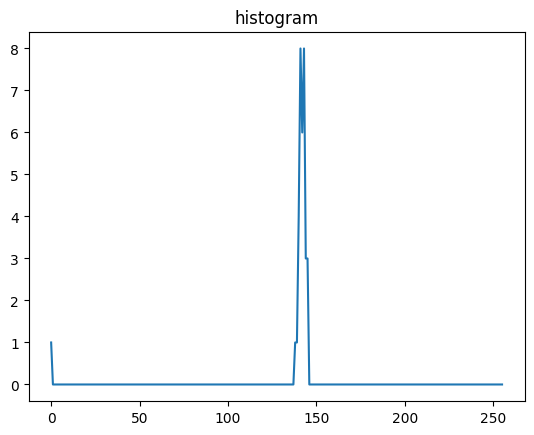

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [5]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  #we had (MAX - MIN) * (F(x,y) - Fmin) / (Fmax - Fmin) so the operations below does this
  #constant is (MAX - MIN) /(Fmax - Fmin)
  constant = 255 / (output_image.max() - output_image.min())
  #then (F(x,y) - Fmin) *
  output_image = np.round((output_image - output_image.min()) * constant)
  # End
  return np.uint8(output_image)

Text(0.5, 1.0, 'stretched histogram')

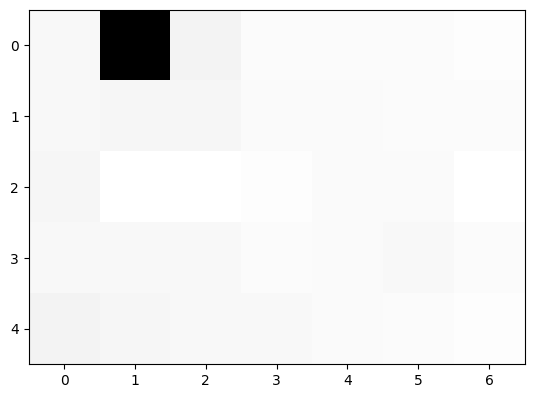

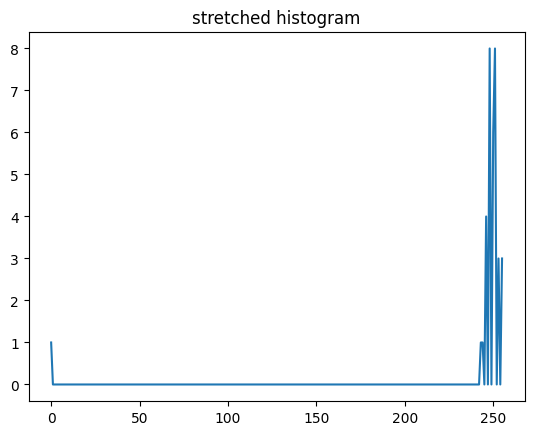

In [6]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [7]:
import numpy as np

def clip_hist(image, min_value, max_value):
    '''
    Clips the histogram of the image to enhance contrast.
    
    Parameters:
        image (numpy.ndarray): Input image.
        min_value (int): Minimum value of the histogram to clip.
        max_value (int): Maximum value of the histogram to clip.

    Returns:
        clipped_image (numpy.ndarray): Image with clipped histogram.
    '''
    # Convert image to float to prevent data overflow during calculations
    output_image = image.astype(float)

    # Calculate the scale constant
    constant = 255 / (max_value - min_value)

    # Scale and shift the image intensities
    output_image = (output_image - min_value) * constant

    # Clip values to ensure they remain within the valid range of [0, 255]
    output_image = np.clip(output_image, 0, 255)

    # Convert back to uint8
    return output_image.astype(np.uint8)


Text(0.5, 1.0, 'clipped histogram')

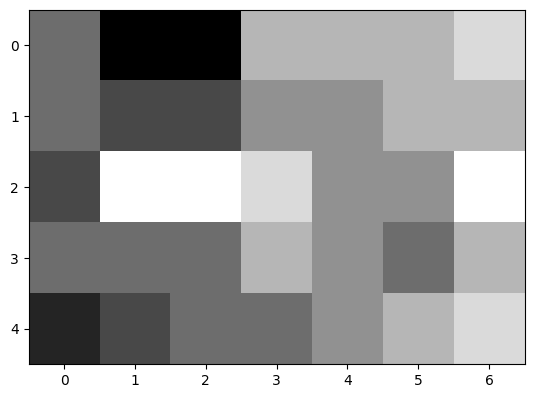

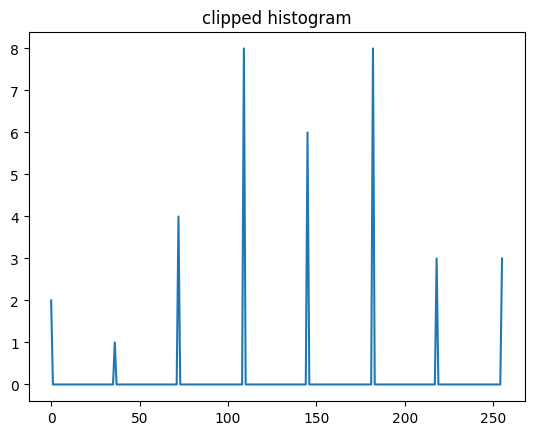

In [8]:
#dont change this cell
min_value = 138
max_value = 145
plt.imshow(clip_hist(image1,min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part3


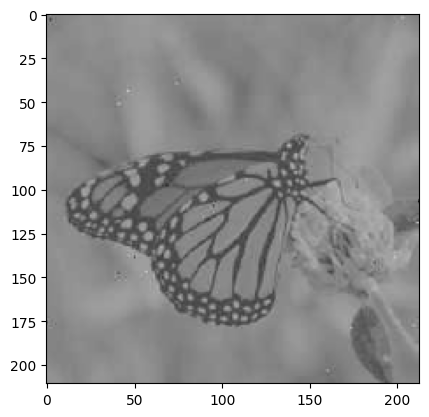

In [9]:
# first read the image and show it.(image2)
image2 = cv2.imread('image2.png')
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)


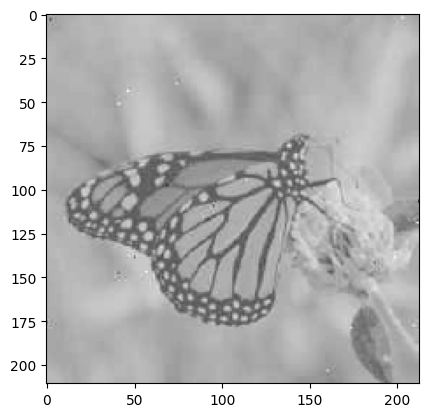

In [10]:
#use stretch_hist function to improve quality of the image and show it
plt.figure()
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)


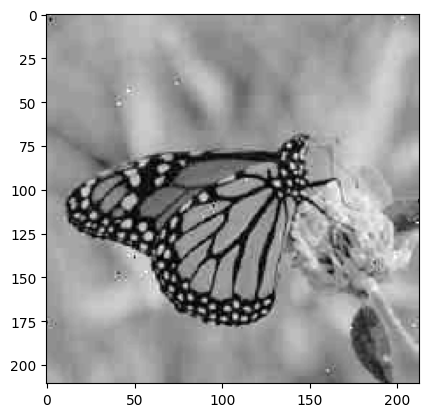

In [13]:
#use clip_hist function to improve quality of the image and show it
plt.figure()
min_value = 70
max_value = 180
plt.imshow(clip_hist(image2,min_value, max_value),cmap='gray',vmin=0,vmax=255)